In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")



Libraries imported successfully!


In [4]:
import pandas as pd

# -----------------------------
# 1. LOAD DATA
# -----------------------------
data = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx")

print("✔ Data Loaded Successfully!")
print("Shape of Dataset:", data.shape)

# -----------------------------
# 2. VIEW FIRST FEW ROWS
# -----------------------------
print("\n📌 First 5 Rows of Dataset:")
print(data.head())

# -----------------------------
# 3. BASIC INFO ABOUT DATA
# -----------------------------
print("\n📌 Dataset Info:")
print(data.info())

# -----------------------------
# 4. SUMMARY STATISTICS
# -----------------------------
print("\n📌 Summary Statistics:")
print(data.describe())

# -----------------------------
# 5. CHECK FOR MISSING VALUES
# -----------------------------
print("\n📌 Missing Values in Each Column:")
print(data.isnull().sum())

# -----------------------------
# 6. CHECK COLUMN NAMES
# -----------------------------
print("\n📌 Column Names:")
print(data.columns.tolist())


✔ Data Loaded Successfully!
Shape of Dataset: (646, 10)

📌 First 5 Rows of Dataset:
   Champion  played  won  drawn  lost  gf  ga  gd  points  notes
0         1     1.0   42     24    12   6  67  31      36     84
1         2     0.0   42     21    11  10  57  40      17     74
2         3     0.0   42     21     9  12  61  65      -4     72
3         4     0.0   42     20    11  11  68  46      22     71
4         5     0.0   42     17    12  13  63  55       8     63

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Champion  646 non-null    int64  
 1   played    44 non-null     float64
 2   won       646 non-null    int64  
 3   drawn     646 non-null    int64  
 4   lost      646 non-null    int64  
 5   gf        646 non-null    int64  
 6   ga        646 non-null    int64  
 7   gd        646 non-null    int64  
 8   points   

TARGET VARIABLE ANALYSIS


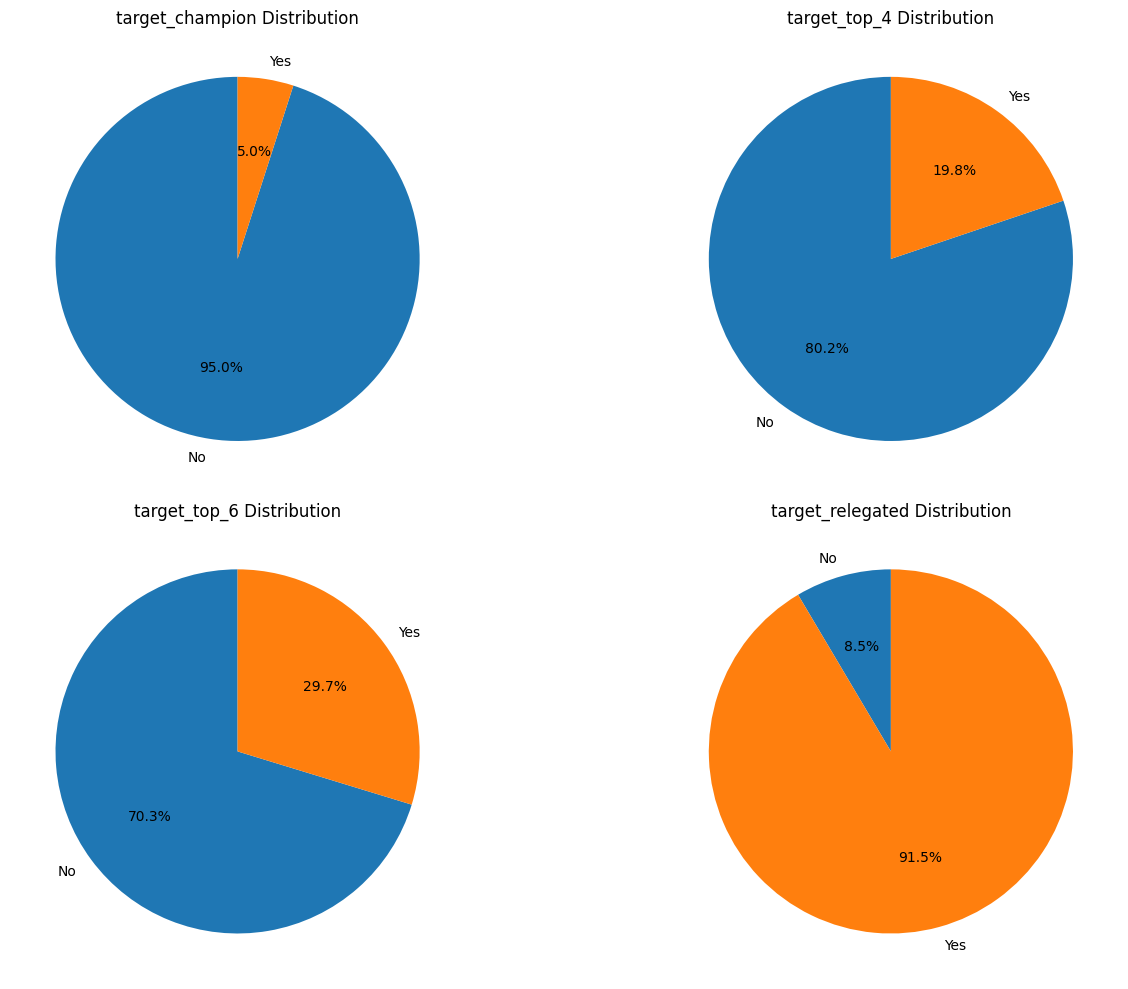


TARGET VARIABLE COUNTS:

target_champion:
target_champion
0    614
1     32
Name: count, dtype: int64

target_top_4:
target_top_4
0    518
1    128
Name: count, dtype: int64

target_top_6:
target_top_6
0    454
1    192
Name: count, dtype: int64

target_relegated:
target_relegated
0     55
1    591
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx")

print("TARGET VARIABLE ANALYSIS")
print("="*60)

# -------------------------------------------------------
# Step 1: Create Target Columns
# -------------------------------------------------------
data['target_champion'] = (data['Champion'] == 1).astype(int)
data['target_top_4'] = (data['Champion'] <= 4).astype(int)
data['target_top_6'] = (data['Champion'] <= 6).astype(int)
data['target_relegated'] = (data['points'] < 40).astype(int)  # Example rule

# List of target columns
target_columns = ['target_champion', 'target_top_4', 'target_top_6', 'target_relegated']

# -------------------------------------------------------
# Step 2: Pie Charts for Each Target Variable
# -------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(target_columns):
    counts = data[col].value_counts().sort_index()  # ensures 0 then 1
    
    axes[i].pie(
        counts.values,
        labels=['No', 'Yes'],
        autopct="%1.1f%%",
        startangle=90
    )
    axes[i].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Step 3: Print Value Counts
# -------------------------------------------------------
print("\nTARGET VARIABLE COUNTS:")
print("="*60)
for col in target_columns:
    print(f"\n{col}:")
    print(data[col].value_counts().sort_index())


 FEATURE CORRELATION HEATMAP


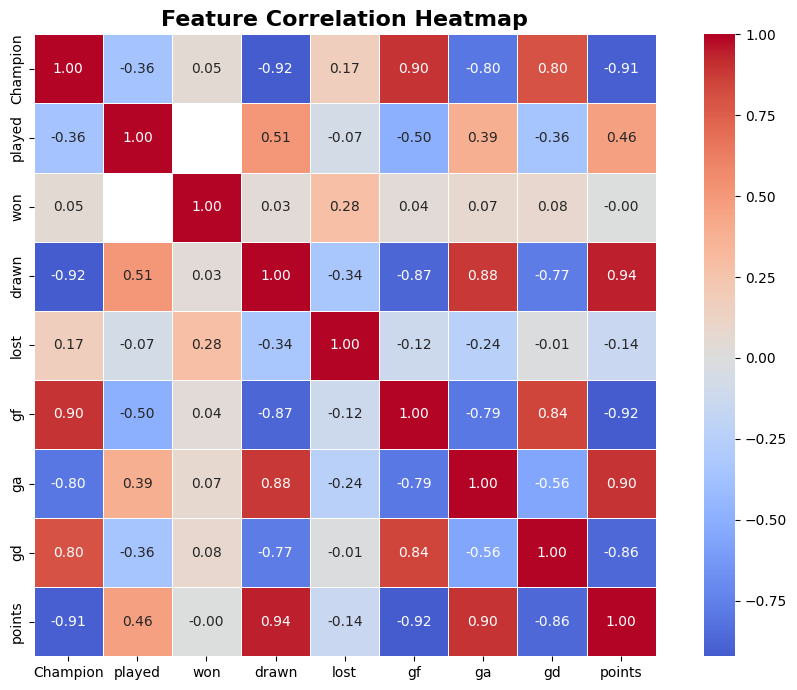


 Key Correlation Insights:
- 'points' strongly correlates with 'won', 'gf', and 'gd'.
- 'ga' (goals conceded) usually has negative correlation with points.
- 'Champion' typically correlates with high points, more wins, and strong goal difference.


In [8]:
# ============================
# FEATURE CORRELATION HEATMAP
# ============================

import seaborn as sns
import matplotlib.pyplot as plt

print(" FEATURE CORRELATION HEATMAP")
print("="*50)

# Select numerical features from your dataset
numerical_features = ['Champion', 'played', 'won', 'drawn', 'lost', 
                      'gf', 'ga', 'gd', 'points']

# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            center=0, square=True, linewidths=0.5, fmt='.2f')

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Insights
print("\n Key Correlation Insights:")
print("- 'points' strongly correlates with 'won', 'gf', and 'gd'.")
print("- 'ga' (goals conceded) usually has negative correlation with points.")
print("- 'Champion' typically correlates with high points, more wins, and strong goal difference.")


 FEATURE DISTRIBUTION ANALYSIS


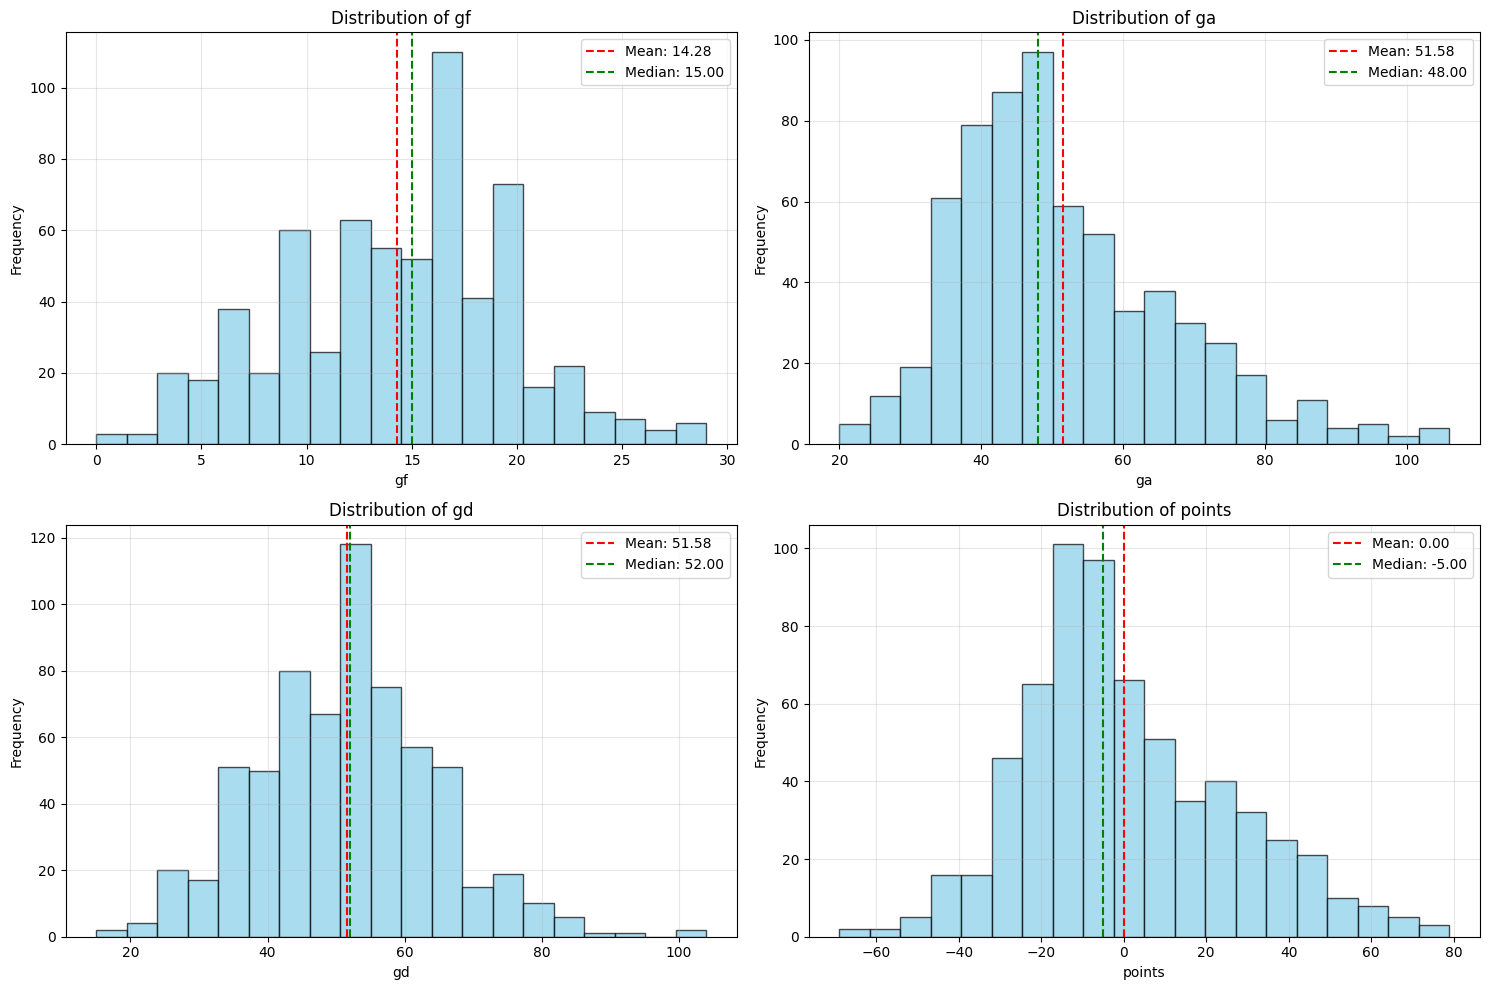

 Feature Statistics:


,gf,ga,gd,points
count,646.000000,646.000000,646.000000,646.000000
mean,14.283282,51.577399,51.577399,0.000000
std,5.401573,15.195452,13.035291,24.952482
min,0.000000,20.000000,15.000000,-69.000000
25%,10.250000,41.000000,43.000000,-17.000000
50%,15.000000,48.000000,52.000000,-5.000000
75%,18.000000,60.750000,59.750000,15.000000
max,29.000000,106.000000,104.000000,79.000000


In [9]:
# ============================
# FEATURE DISTRIBUTION ANALYSIS
# ============================

import matplotlib.pyplot as plt

print(" FEATURE DISTRIBUTION ANALYSIS")
print("="*50)

# Select features from your dataset
features_to_plot = ['gf', 'ga', 'gd', 'points']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    axes[i].hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')

    # Mean and median lines
    axes[i].axvline(df[feature].mean(), color='red', linestyle='--',
                    label=f"Mean: {df[feature].mean():.2f}")
    axes[i].axvline(df[feature].median(), color='green', linestyle='--',
                    label=f"Median: {df[feature].median():.2f}")

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Feature Statistics:")
display(df[features_to_plot].describe())


In [10]:
# ============================
# DATA PREPARATION FOR MODELING
# ============================

print("DATA PREPARATION FOR MODELING")
print("="*50)

# Your dataset columns:
# ['Champion', 'played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd', 'points']

# 1. Select features (X) and target (y)
# We choose "points" as target for regression
target = 'points'
features = ['Champion', 'played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd']

X = df[features]
y = df[target]

print("\n Selected Features:", features)
print(" Target Variable:", target)

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 2. Display feature descriptions (custom for your dataset)
print("\n FEATURE DESCRIPTIONS:")
feature_descriptions = {
    'Champion': '1 = Champion, 0 = Not Champion',
    'played': 'Total matches played',
    'won': 'Total wins',
    'drawn': 'Total draws',
    'lost': 'Total losses',
    'gf': 'Goals scored',
    'ga': 'Goals conceded',
    'gd': 'Goal difference (gf - ga)'
}

for col, desc in feature_descriptions.items():
    print(f"- {col}: {desc}")


DATA PREPARATION FOR MODELING

 Selected Features: ['Champion', 'played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd']
 Target Variable: points

Features shape: (646, 8)
Target shape: (646,)

 FEATURE DESCRIPTIONS:
- Champion: 1 = Champion, 0 = Not Champion
- played: Total matches played
- won: Total wins
- drawn: Total draws
- lost: Total losses
- gf: Goals scored
- ga: Goals conceded
- gd: Goal difference (gf - ga)


In [13]:
print(df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Champion  646 non-null    int64  
 1   played    44 non-null     float64
 2   won       646 non-null    int64  
 3   drawn     646 non-null    int64  
 4   lost      646 non-null    int64  
 5   gf        646 non-null    int64  
 6   ga        646 non-null    int64  
 7   gd        646 non-null    int64  
 8   points    646 non-null    int64  
 9   notes     646 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 50.6 KB
None
Champion      0
played      602
won           0
drawn         0
lost          0
gf            0
ga            0
gd            0
points        0
notes         0
dtype: int64


In [17]:
df_clean = df.drop(columns=['played'])


In [18]:
df['played'] = df['played'].fillna(df['played'].median())


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='macro', zero_division=0),
        recall_score(y_test, y_pred, average='macro', zero_division=0),
        f1_score(y_test, y_pred, average='macro', zero_division=0)
    ])

results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1-Score'])
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.315385   0.321982  0.338209  0.303301
1        Random Forest  0.246154   0.249012  0.256897  0.228994
2                  SVM  0.153846   0.118670  0.181784  0.118426
